# Determining Feature Importance With Boruta

## Importing Data
Also removing some columns from the data that are unnecessary for this step 

In [3]:
library(here)
library(ggplot2)
library(caret)
library(Boruta)
data = read.csv(here("data","data.csv"))
data[,c("X","income","education","population","unemployment","popDensity","laborforce","poverty","diversity","x_sp","y_sp","zip_city","cncldist","borocode")] = NULL

Warning message:
"package 'here' was built under R version 3.6.3"here() starts at D:/nyctrees
Loading required package: lattice
Warning message:
"package 'Boruta' was built under R version 3.6.3"Loading required package: ranger


## Boruta Plot Function
This function will let us visualize the results of our Boruta models

In [14]:
boruta_plot = function(model, main_title="Boruta Feature Importance Plot",save_plot=F) {
  if(save_plot==T){png(here("plots", paste(main_title,".png", sep="")), width = 465, height = 225, units='mm', res = 300)}
  plot(model, xlab = "", xaxt = "n", main = main_title)
  
  lz<-lapply(1:ncol(model$ImpHistory),function(i)
    
    model$ImpHistory[is.finite(model$ImpHistory[,i]),i])
  
  names(lz) <- colnames(model$ImpHistory)
  
  Labels <- sort(sapply(lz,median))
  
  axis(side = 1,las=2,labels = names(Labels),
       
       at = 1:ncol(model$ImpHistory), cex.axis = 0.7)
  if(save_plot==T){dev.off()}
  return()
}

## Determining Initial Correlation

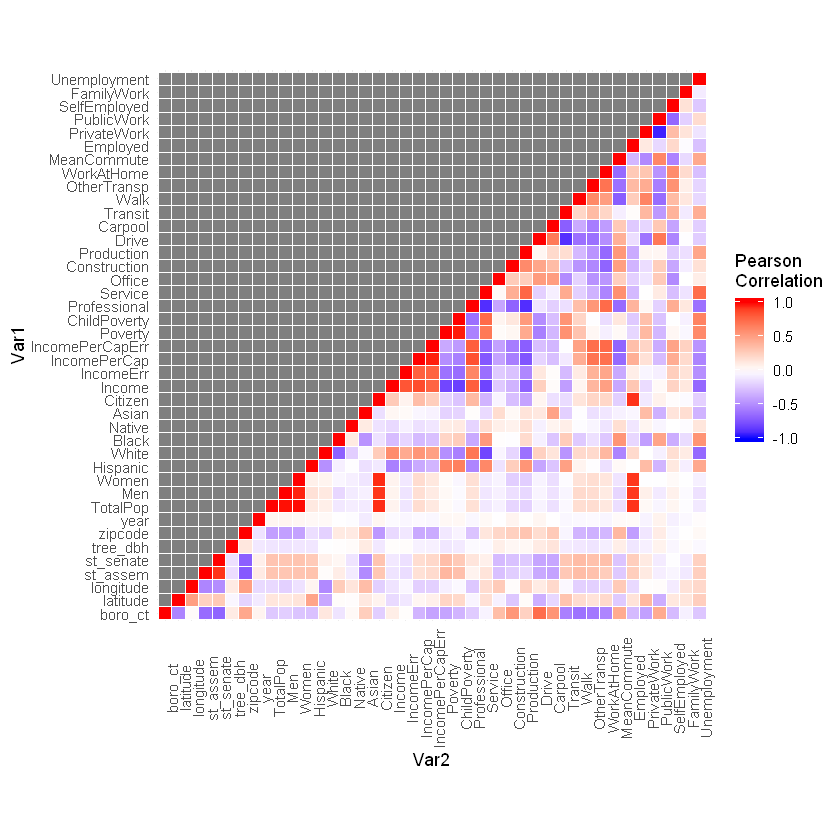

In [8]:
library(reshape2)
data_num = data[,unlist(lapply(data, is.numeric))]
data_cor = cor(data_num, use="complete.obs")

get_upper_tri = function(df){
  df[lower.tri(df)]<- NA
  return(df)
}

upper = get_upper_tri(data_cor)

melted = melt(upper, na.rm = F)
ggplot(data = melted, aes(Var2, Var1, fill = value))+
  geom_tile(color = "white")+
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1,1), space = "Lab", 
                       name="Pearson\nCorrelation") +
  theme_minimal()+ 
  theme(axis.text.x = element_text(angle = 90))+
  coord_fixed()

### Preparing Data for Boruta

In [9]:
testing = data[complete.cases(data),]
testing = testing[testing$year == 2015,]
testing[,c("ntaname_full","nta_name","nta","genus","species")] = NULL
testing$healthstatus[testing$healthstatus == 'Alive'] = 'Good'
testing$healthstatus = droplevels(testing$healthstatus)

partition <- createDataPartition(testing$healthstatus, p = .5, list = FALSE, times = 1)
train = testing[partition,]
test = testing[-partition,]

## Primary Data Section
### Performing Boruta on Healthstatus in Primary Data
[Output found here](https://github.com/kbfoerster/nyctrees/blob/master/plots/NYCTrees%20Feature%20Importance.png)

In [11]:
bor = Boruta(healthstatus ~., train, doTrace = 2)

 1. run of importance source...


Growing trees.. Progress: 21%. Estimated remaining time: 1 minute, 53 seconds.
Growing trees.. Progress: 44%. Estimated remaining time: 1 minute, 19 seconds.
Growing trees.. Progress: 67%. Estimated remaining time: 45 seconds.
Growing trees.. Progress: 90%. Estimated remaining time: 13 seconds.
Computing permutation importance.. Progress: 10%. Estimated remaining time: 4 minutes, 51 seconds.
Computing permutation importance.. Progress: 19%. Estimated remaining time: 4 minutes, 25 seconds.
Computing permutation importance.. Progress: 29%. Estimated remaining time: 3 minutes, 50 seconds.
Computing permutation importance.. Progress: 40%. Estimated remaining time: 3 minutes, 13 seconds.
Computing permutation importance.. Progress: 50%. Estimated remaining time: 2 minutes, 40 seconds.
Computing permutation importance.. Progress: 60%. Estimated remaining time: 2 minutes, 9 seconds.
Computing permutation importance.. Progress: 70%. Estimated remaining time: 1 minute, 36 seconds.
Computing per

 2. run of importance source...


Growing trees.. Progress: 22%. Estimated remaining time: 1 minute, 52 seconds.
Growing trees.. Progress: 45%. Estimated remaining time: 1 minute, 15 seconds.
Growing trees.. Progress: 67%. Estimated remaining time: 45 seconds.
Growing trees.. Progress: 91%. Estimated remaining time: 12 seconds.
Computing permutation importance.. Progress: 10%. Estimated remaining time: 5 minutes, 3 seconds.
Computing permutation importance.. Progress: 22%. Estimated remaining time: 3 minutes, 56 seconds.
Computing permutation importance.. Progress: 34%. Estimated remaining time: 3 minutes, 11 seconds.
Computing permutation importance.. Progress: 45%. Estimated remaining time: 2 minutes, 36 seconds.
Computing permutation importance.. Progress: 56%. Estimated remaining time: 2 minutes, 5 seconds.
Computing permutation importance.. Progress: 67%. Estimated remaining time: 1 minute, 33 seconds.
Computing permutation importance.. Progress: 78%. Estimated remaining time: 1 minute, 3 seconds.
Computing permut

 3. run of importance source...


Growing trees.. Progress: 21%. Estimated remaining time: 1 minute, 53 seconds.
Growing trees.. Progress: 44%. Estimated remaining time: 1 minute, 20 seconds.
Growing trees.. Progress: 67%. Estimated remaining time: 46 seconds.
Growing trees.. Progress: 89%. Estimated remaining time: 15 seconds.
Computing permutation importance.. Progress: 9%. Estimated remaining time: 4 minutes, 58 seconds.
Computing permutation importance.. Progress: 19%. Estimated remaining time: 4 minutes, 20 seconds.
Computing permutation importance.. Progress: 29%. Estimated remaining time: 3 minutes, 50 seconds.
Computing permutation importance.. Progress: 39%. Estimated remaining time: 3 minutes, 17 seconds.
Computing permutation importance.. Progress: 50%. Estimated remaining time: 2 minutes, 39 seconds.
Computing permutation importance.. Progress: 60%. Estimated remaining time: 2 minutes, 6 seconds.
Computing permutation importance.. Progress: 70%. Estimated remaining time: 1 minute, 33 seconds.
Computing perm

 4. run of importance source...


Growing trees.. Progress: 22%. Estimated remaining time: 1 minute, 49 seconds.
Growing trees.. Progress: 45%. Estimated remaining time: 1 minute, 14 seconds.
Growing trees.. Progress: 68%. Estimated remaining time: 44 seconds.
Growing trees.. Progress: 92%. Estimated remaining time: 11 seconds.
Computing permutation importance.. Progress: 10%. Estimated remaining time: 4 minutes, 51 seconds.
Computing permutation importance.. Progress: 19%. Estimated remaining time: 4 minutes, 21 seconds.
Computing permutation importance.. Progress: 30%. Estimated remaining time: 3 minutes, 39 seconds.
Computing permutation importance.. Progress: 40%. Estimated remaining time: 3 minutes, 5 seconds.
Computing permutation importance.. Progress: 51%. Estimated remaining time: 2 minutes, 33 seconds.
Computing permutation importance.. Progress: 61%. Estimated remaining time: 2 minutes, 1 seconds.
Computing permutation importance.. Progress: 71%. Estimated remaining time: 1 minute, 28 seconds.
Computing perm

 5. run of importance source...


Growing trees.. Progress: 21%. Estimated remaining time: 1 minute, 55 seconds.
Growing trees.. Progress: 45%. Estimated remaining time: 1 minute, 17 seconds.
Growing trees.. Progress: 67%. Estimated remaining time: 44 seconds.
Growing trees.. Progress: 91%. Estimated remaining time: 12 seconds.
Computing permutation importance.. Progress: 10%. Estimated remaining time: 5 minutes, 1 seconds.
Computing permutation importance.. Progress: 19%. Estimated remaining time: 4 minutes, 29 seconds.
Computing permutation importance.. Progress: 29%. Estimated remaining time: 3 minutes, 54 seconds.
Computing permutation importance.. Progress: 39%. Estimated remaining time: 3 minutes, 17 seconds.
Computing permutation importance.. Progress: 49%. Estimated remaining time: 2 minutes, 45 seconds.
Computing permutation importance.. Progress: 59%. Estimated remaining time: 2 minutes, 14 seconds.
Computing permutation importance.. Progress: 68%. Estimated remaining time: 1 minute, 43 seconds.
Computing per

 6. run of importance source...


Growing trees.. Progress: 22%. Estimated remaining time: 1 minute, 54 seconds.
Growing trees.. Progress: 46%. Estimated remaining time: 1 minute, 15 seconds.
Growing trees.. Progress: 68%. Estimated remaining time: 43 seconds.
Growing trees.. Progress: 92%. Estimated remaining time: 11 seconds.
Computing permutation importance.. Progress: 9%. Estimated remaining time: 4 minutes, 58 seconds.
Computing permutation importance.. Progress: 19%. Estimated remaining time: 4 minutes, 21 seconds.
Computing permutation importance.. Progress: 30%. Estimated remaining time: 3 minutes, 45 seconds.
Computing permutation importance.. Progress: 40%. Estimated remaining time: 3 minutes, 7 seconds.
Computing permutation importance.. Progress: 50%. Estimated remaining time: 2 minutes, 35 seconds.
Computing permutation importance.. Progress: 61%. Estimated remaining time: 1 minute, 59 seconds.
Computing permutation importance.. Progress: 71%. Estimated remaining time: 1 minute, 30 seconds.
Computing permu

 7. run of importance source...


Growing trees.. Progress: 22%. Estimated remaining time: 1 minute, 54 seconds.
Growing trees.. Progress: 44%. Estimated remaining time: 1 minute, 21 seconds.
Growing trees.. Progress: 67%. Estimated remaining time: 47 seconds.
Growing trees.. Progress: 90%. Estimated remaining time: 14 seconds.
Computing permutation importance.. Progress: 10%. Estimated remaining time: 5 minutes, 22 seconds.
Computing permutation importance.. Progress: 20%. Estimated remaining time: 4 minutes, 20 seconds.
Computing permutation importance.. Progress: 30%. Estimated remaining time: 3 minutes, 44 seconds.
Computing permutation importance.. Progress: 40%. Estimated remaining time: 3 minutes, 13 seconds.
Computing permutation importance.. Progress: 51%. Estimated remaining time: 2 minutes, 33 seconds.
Computing permutation importance.. Progress: 61%. Estimated remaining time: 2 minutes, 2 seconds.
Computing permutation importance.. Progress: 71%. Estimated remaining time: 1 minute, 30 seconds.
Computing per

 8. run of importance source...


Growing trees.. Progress: 22%. Estimated remaining time: 1 minute, 54 seconds.
Growing trees.. Progress: 45%. Estimated remaining time: 1 minute, 17 seconds.
Growing trees.. Progress: 68%. Estimated remaining time: 44 seconds.
Growing trees.. Progress: 91%. Estimated remaining time: 11 seconds.
Computing permutation importance.. Progress: 10%. Estimated remaining time: 5 minutes, 3 seconds.
Computing permutation importance.. Progress: 21%. Estimated remaining time: 4 minutes, 3 seconds.
Computing permutation importance.. Progress: 32%. Estimated remaining time: 3 minutes, 25 seconds.
Computing permutation importance.. Progress: 42%. Estimated remaining time: 2 minutes, 54 seconds.
Computing permutation importance.. Progress: 53%. Estimated remaining time: 2 minutes, 17 seconds.
Computing permutation importance.. Progress: 64%. Estimated remaining time: 1 minute, 45 seconds.
Computing permutation importance.. Progress: 74%. Estimated remaining time: 1 minute, 17 seconds.
Computing permu

 9. run of importance source...


Growing trees.. Progress: 22%. Estimated remaining time: 1 minute, 52 seconds.
Growing trees.. Progress: 44%. Estimated remaining time: 1 minute, 18 seconds.
Growing trees.. Progress: 67%. Estimated remaining time: 44 seconds.
Growing trees.. Progress: 90%. Estimated remaining time: 14 seconds.
Computing permutation importance.. Progress: 10%. Estimated remaining time: 4 minutes, 54 seconds.
Computing permutation importance.. Progress: 21%. Estimated remaining time: 3 minutes, 55 seconds.
Computing permutation importance.. Progress: 32%. Estimated remaining time: 3 minutes, 23 seconds.
Computing permutation importance.. Progress: 43%. Estimated remaining time: 2 minutes, 48 seconds.
Computing permutation importance.. Progress: 54%. Estimated remaining time: 2 minutes, 16 seconds.
Computing permutation importance.. Progress: 64%. Estimated remaining time: 1 minute, 47 seconds.
Computing permutation importance.. Progress: 75%. Estimated remaining time: 1 minute, 13 seconds.
Computing per

 10. run of importance source...


Growing trees.. Progress: 19%. Estimated remaining time: 2 minutes, 8 seconds.
Growing trees.. Progress: 41%. Estimated remaining time: 1 minute, 30 seconds.
Growing trees.. Progress: 62%. Estimated remaining time: 56 seconds.
Growing trees.. Progress: 85%. Estimated remaining time: 21 seconds.
Computing permutation importance.. Progress: 9%. Estimated remaining time: 5 minutes, 5 seconds.
Computing permutation importance.. Progress: 19%. Estimated remaining time: 4 minutes, 27 seconds.
Computing permutation importance.. Progress: 28%. Estimated remaining time: 3 minutes, 56 seconds.
Computing permutation importance.. Progress: 38%. Estimated remaining time: 3 minutes, 25 seconds.
Computing permutation importance.. Progress: 48%. Estimated remaining time: 2 minutes, 50 seconds.
Computing permutation importance.. Progress: 58%. Estimated remaining time: 2 minutes, 16 seconds.
Computing permutation importance.. Progress: 68%. Estimated remaining time: 1 minute, 43 seconds.
Computing perm

 11. run of importance source...


Growing trees.. Progress: 22%. Estimated remaining time: 1 minute, 49 seconds.
Growing trees.. Progress: 45%. Estimated remaining time: 1 minute, 17 seconds.
Growing trees.. Progress: 68%. Estimated remaining time: 43 seconds.
Growing trees.. Progress: 91%. Estimated remaining time: 12 seconds.
Computing permutation importance.. Progress: 10%. Estimated remaining time: 5 minutes, 1 seconds.
Computing permutation importance.. Progress: 19%. Estimated remaining time: 4 minutes, 25 seconds.
Computing permutation importance.. Progress: 29%. Estimated remaining time: 3 minutes, 48 seconds.
Computing permutation importance.. Progress: 39%. Estimated remaining time: 3 minutes, 15 seconds.
Computing permutation importance.. Progress: 49%. Estimated remaining time: 2 minutes, 43 seconds.
Computing permutation importance.. Progress: 59%. Estimated remaining time: 2 minutes, 12 seconds.
Computing permutation importance.. Progress: 69%. Estimated remaining time: 1 minute, 41 seconds.
Computing per

 12. run of importance source...


Growing trees.. Progress: 22%. Estimated remaining time: 1 minute, 52 seconds.
Growing trees.. Progress: 44%. Estimated remaining time: 1 minute, 19 seconds.
Growing trees.. Progress: 66%. Estimated remaining time: 47 seconds.
Growing trees.. Progress: 89%. Estimated remaining time: 14 seconds.
Computing permutation importance.. Progress: 10%. Estimated remaining time: 5 minutes, 22 seconds.
Computing permutation importance.. Progress: 20%. Estimated remaining time: 4 minutes, 34 seconds.
Computing permutation importance.. Progress: 30%. Estimated remaining time: 3 minutes, 50 seconds.
Computing permutation importance.. Progress: 40%. Estimated remaining time: 3 minutes, 13 seconds.
Computing permutation importance.. Progress: 51%. Estimated remaining time: 2 minutes, 35 seconds.
Computing permutation importance.. Progress: 61%. Estimated remaining time: 2 minutes, 2 seconds.
Computing permutation importance.. Progress: 70%. Estimated remaining time: 1 minute, 34 seconds.
Computing per

 13. run of importance source...


Growing trees.. Progress: 22%. Estimated remaining time: 1 minute, 54 seconds.
Growing trees.. Progress: 45%. Estimated remaining time: 1 minute, 16 seconds.
Growing trees.. Progress: 68%. Estimated remaining time: 45 seconds.
Growing trees.. Progress: 90%. Estimated remaining time: 13 seconds.
Computing permutation importance.. Progress: 9%. Estimated remaining time: 5 minutes, 21 seconds.
Computing permutation importance.. Progress: 19%. Estimated remaining time: 4 minutes, 34 seconds.
Computing permutation importance.. Progress: 29%. Estimated remaining time: 3 minutes, 57 seconds.
Computing permutation importance.. Progress: 39%. Estimated remaining time: 3 minutes, 25 seconds.
Computing permutation importance.. Progress: 48%. Estimated remaining time: 2 minutes, 52 seconds.
Computing permutation importance.. Progress: 57%. Estimated remaining time: 2 minutes, 25 seconds.
Computing permutation importance.. Progress: 66%. Estimated remaining time: 1 minute, 53 seconds.
Computing per

After 13 iterations, +1.7 hours: 
 confirmed 43 attributes: Asian, Black, boro_ct, boroname, Carpool and 38 more;
 rejected 1 attribute: year;
 still have 1 attribute left.

 14. run of importance source...


Growing trees.. Progress: 21%. Estimated remaining time: 1 minute, 55 seconds.
Growing trees.. Progress: 42%. Estimated remaining time: 1 minute, 24 seconds.
Growing trees.. Progress: 64%. Estimated remaining time: 52 seconds.
Growing trees.. Progress: 86%. Estimated remaining time: 20 seconds.
Computing permutation importance.. Progress: 9%. Estimated remaining time: 5 minutes, 5 seconds.
Computing permutation importance.. Progress: 19%. Estimated remaining time: 4 minutes, 24 seconds.
Computing permutation importance.. Progress: 29%. Estimated remaining time: 3 minutes, 47 seconds.
Computing permutation importance.. Progress: 39%. Estimated remaining time: 3 minutes, 15 seconds.
Computing permutation importance.. Progress: 49%. Estimated remaining time: 2 minutes, 43 seconds.
Computing permutation importance.. Progress: 59%. Estimated remaining time: 2 minutes, 10 seconds.
Computing permutation importance.. Progress: 70%. Estimated remaining time: 1 minute, 36 seconds.
Computing perm

 15. run of importance source...


Growing trees.. Progress: 21%. Estimated remaining time: 1 minute, 55 seconds.
Growing trees.. Progress: 44%. Estimated remaining time: 1 minute, 18 seconds.
Growing trees.. Progress: 66%. Estimated remaining time: 47 seconds.
Growing trees.. Progress: 88%. Estimated remaining time: 16 seconds.
Computing permutation importance.. Progress: 10%. Estimated remaining time: 4 minutes, 51 seconds.
Computing permutation importance.. Progress: 19%. Estimated remaining time: 4 minutes, 25 seconds.
Computing permutation importance.. Progress: 30%. Estimated remaining time: 3 minutes, 46 seconds.
Computing permutation importance.. Progress: 40%. Estimated remaining time: 3 minutes, 11 seconds.
Computing permutation importance.. Progress: 51%. Estimated remaining time: 2 minutes, 34 seconds.
Computing permutation importance.. Progress: 61%. Estimated remaining time: 2 minutes, 3 seconds.
Computing permutation importance.. Progress: 71%. Estimated remaining time: 1 minute, 32 seconds.
Computing per

 16. run of importance source...


Growing trees.. Progress: 21%. Estimated remaining time: 1 minute, 58 seconds.
Growing trees.. Progress: 43%. Estimated remaining time: 1 minute, 20 seconds.
Growing trees.. Progress: 66%. Estimated remaining time: 47 seconds.
Growing trees.. Progress: 88%. Estimated remaining time: 16 seconds.
Computing permutation importance.. Progress: 9%. Estimated remaining time: 4 minutes, 58 seconds.
Computing permutation importance.. Progress: 19%. Estimated remaining time: 4 minutes, 30 seconds.
Computing permutation importance.. Progress: 31%. Estimated remaining time: 3 minutes, 39 seconds.
Computing permutation importance.. Progress: 41%. Estimated remaining time: 3 minutes, 2 seconds.
Computing permutation importance.. Progress: 53%. Estimated remaining time: 2 minutes, 24 seconds.
Computing permutation importance.. Progress: 63%. Estimated remaining time: 1 minute, 52 seconds.
Computing permutation importance.. Progress: 74%. Estimated remaining time: 1 minute, 16 seconds.
Computing permu

 17. run of importance source...


Growing trees.. Progress: 21%. Estimated remaining time: 1 minute, 53 seconds.
Growing trees.. Progress: 44%. Estimated remaining time: 1 minute, 20 seconds.
Growing trees.. Progress: 67%. Estimated remaining time: 46 seconds.
Growing trees.. Progress: 89%. Estimated remaining time: 14 seconds.
Computing permutation importance.. Progress: 10%. Estimated remaining time: 4 minutes, 54 seconds.
Computing permutation importance.. Progress: 21%. Estimated remaining time: 3 minutes, 57 seconds.
Computing permutation importance.. Progress: 31%. Estimated remaining time: 3 minutes, 29 seconds.
Computing permutation importance.. Progress: 42%. Estimated remaining time: 2 minutes, 55 seconds.
Computing permutation importance.. Progress: 53%. Estimated remaining time: 2 minutes, 22 seconds.
Computing permutation importance.. Progress: 63%. Estimated remaining time: 1 minute, 53 seconds.
Computing permutation importance.. Progress: 73%. Estimated remaining time: 1 minute, 21 seconds.
Computing per

 18. run of importance source...


Growing trees.. Progress: 22%. Estimated remaining time: 1 minute, 52 seconds.
Growing trees.. Progress: 44%. Estimated remaining time: 1 minute, 17 seconds.
Growing trees.. Progress: 68%. Estimated remaining time: 44 seconds.
Growing trees.. Progress: 90%. Estimated remaining time: 13 seconds.
Computing permutation importance.. Progress: 9%. Estimated remaining time: 5 minutes, 5 seconds.
Computing permutation importance.. Progress: 19%. Estimated remaining time: 4 minutes, 21 seconds.
Computing permutation importance.. Progress: 30%. Estimated remaining time: 3 minutes, 41 seconds.
Computing permutation importance.. Progress: 40%. Estimated remaining time: 3 minutes, 5 seconds.
Computing permutation importance.. Progress: 51%. Estimated remaining time: 2 minutes, 30 seconds.
Computing permutation importance.. Progress: 62%. Estimated remaining time: 1 minute, 58 seconds.
Computing permutation importance.. Progress: 72%. Estimated remaining time: 1 minute, 28 seconds.
Computing permut

 19. run of importance source...


Growing trees.. Progress: 21%. Estimated remaining time: 1 minute, 56 seconds.
Growing trees.. Progress: 44%. Estimated remaining time: 1 minute, 19 seconds.
Growing trees.. Progress: 66%. Estimated remaining time: 48 seconds.
Growing trees.. Progress: 88%. Estimated remaining time: 17 seconds.
Computing permutation importance.. Progress: 10%. Estimated remaining time: 5 minutes, 12 seconds.
Computing permutation importance.. Progress: 21%. Estimated remaining time: 4 minutes, 4 seconds.
Computing permutation importance.. Progress: 32%. Estimated remaining time: 3 minutes, 28 seconds.
Computing permutation importance.. Progress: 42%. Estimated remaining time: 2 minutes, 56 seconds.
Computing permutation importance.. Progress: 53%. Estimated remaining time: 2 minutes, 23 seconds.
Computing permutation importance.. Progress: 63%. Estimated remaining time: 1 minute, 50 seconds.
Computing permutation importance.. Progress: 74%. Estimated remaining time: 1 minute, 17 seconds.
Computing perm

 20. run of importance source...


Growing trees.. Progress: 21%. Estimated remaining time: 1 minute, 53 seconds.
Growing trees.. Progress: 44%. Estimated remaining time: 1 minute, 18 seconds.
Growing trees.. Progress: 67%. Estimated remaining time: 46 seconds.
Growing trees.. Progress: 89%. Estimated remaining time: 15 seconds.
Computing permutation importance.. Progress: 10%. Estimated remaining time: 4 minutes, 54 seconds.
Computing permutation importance.. Progress: 21%. Estimated remaining time: 3 minutes, 57 seconds.
Computing permutation importance.. Progress: 32%. Estimated remaining time: 3 minutes, 24 seconds.
Computing permutation importance.. Progress: 43%. Estimated remaining time: 2 minutes, 51 seconds.
Computing permutation importance.. Progress: 54%. Estimated remaining time: 2 minutes, 14 seconds.
Computing permutation importance.. Progress: 65%. Estimated remaining time: 1 minute, 43 seconds.
Computing permutation importance.. Progress: 76%. Estimated remaining time: 1 minute, 8 seconds.
Computing perm

 21. run of importance source...


Growing trees.. Progress: 21%. Estimated remaining time: 1 minute, 53 seconds.
Growing trees.. Progress: 44%. Estimated remaining time: 1 minute, 19 seconds.
Growing trees.. Progress: 66%. Estimated remaining time: 47 seconds.
Growing trees.. Progress: 89%. Estimated remaining time: 15 seconds.
Computing permutation importance.. Progress: 10%. Estimated remaining time: 4 minutes, 54 seconds.
Computing permutation importance.. Progress: 22%. Estimated remaining time: 3 minutes, 53 seconds.
Computing permutation importance.. Progress: 33%. Estimated remaining time: 3 minutes, 15 seconds.
Computing permutation importance.. Progress: 44%. Estimated remaining time: 2 minutes, 41 seconds.
Computing permutation importance.. Progress: 55%. Estimated remaining time: 2 minutes, 8 seconds.
Computing permutation importance.. Progress: 66%. Estimated remaining time: 1 minute, 38 seconds.
Computing permutation importance.. Progress: 77%. Estimated remaining time: 1 minute, 4 seconds.
Computing permu

 22. run of importance source...


Growing trees.. Progress: 21%. Estimated remaining time: 1 minute, 55 seconds.
Growing trees.. Progress: 44%. Estimated remaining time: 1 minute, 18 seconds.
Growing trees.. Progress: 66%. Estimated remaining time: 47 seconds.
Growing trees.. Progress: 89%. Estimated remaining time: 14 seconds.
Computing permutation importance.. Progress: 10%. Estimated remaining time: 4 minutes, 54 seconds.
Computing permutation importance.. Progress: 22%. Estimated remaining time: 3 minutes, 45 seconds.
Computing permutation importance.. Progress: 33%. Estimated remaining time: 3 minutes, 7 seconds.
Computing permutation importance.. Progress: 45%. Estimated remaining time: 2 minutes, 31 seconds.
Computing permutation importance.. Progress: 55%. Estimated remaining time: 2 minutes, 7 seconds.
Computing permutation importance.. Progress: 66%. Estimated remaining time: 1 minute, 35 seconds.
Computing permutation importance.. Progress: 77%. Estimated remaining time: 1 minute, 6 seconds.
Computing permut

 23. run of importance source...


Growing trees.. Progress: 22%. Estimated remaining time: 1 minute, 52 seconds.
Growing trees.. Progress: 44%. Estimated remaining time: 1 minute, 18 seconds.
Growing trees.. Progress: 67%. Estimated remaining time: 45 seconds.
Growing trees.. Progress: 90%. Estimated remaining time: 14 seconds.
Computing permutation importance.. Progress: 10%. Estimated remaining time: 4 minutes, 54 seconds.
Computing permutation importance.. Progress: 21%. Estimated remaining time: 3 minutes, 59 seconds.
Computing permutation importance.. Progress: 31%. Estimated remaining time: 3 minutes, 27 seconds.
Computing permutation importance.. Progress: 41%. Estimated remaining time: 3 minutes, 4 seconds.
Computing permutation importance.. Progress: 52%. Estimated remaining time: 2 minutes, 27 seconds.
Computing permutation importance.. Progress: 62%. Estimated remaining time: 1 minute, 55 seconds.
Computing permutation importance.. Progress: 73%. Estimated remaining time: 1 minute, 22 seconds.
Computing perm

 24. run of importance source...


Growing trees.. Progress: 21%. Estimated remaining time: 1 minute, 55 seconds.
Growing trees.. Progress: 43%. Estimated remaining time: 1 minute, 22 seconds.
Growing trees.. Progress: 65%. Estimated remaining time: 50 seconds.
Growing trees.. Progress: 88%. Estimated remaining time: 17 seconds.
Computing permutation importance.. Progress: 10%. Estimated remaining time: 5 minutes, 22 seconds.
Computing permutation importance.. Progress: 22%. Estimated remaining time: 4 minutes, 11 seconds.
Computing permutation importance.. Progress: 32%. Estimated remaining time: 3 minutes, 30 seconds.
Computing permutation importance.. Progress: 43%. Estimated remaining time: 2 minutes, 56 seconds.
Computing permutation importance.. Progress: 53%. Estimated remaining time: 2 minutes, 24 seconds.
Computing permutation importance.. Progress: 63%. Estimated remaining time: 1 minute, 54 seconds.
Computing permutation importance.. Progress: 73%. Estimated remaining time: 1 minute, 24 seconds.
Computing per

 25. run of importance source...


Growing trees.. Progress: 22%. Estimated remaining time: 1 minute, 52 seconds.
Growing trees.. Progress: 44%. Estimated remaining time: 1 minute, 18 seconds.
Growing trees.. Progress: 67%. Estimated remaining time: 45 seconds.
Growing trees.. Progress: 90%. Estimated remaining time: 13 seconds.
Computing permutation importance.. Progress: 10%. Estimated remaining time: 4 minutes, 45 seconds.
Computing permutation importance.. Progress: 21%. Estimated remaining time: 3 minutes, 51 seconds.
Computing permutation importance.. Progress: 32%. Estimated remaining time: 3 minutes, 17 seconds.
Computing permutation importance.. Progress: 43%. Estimated remaining time: 2 minutes, 45 seconds.
Computing permutation importance.. Progress: 54%. Estimated remaining time: 2 minutes, 14 seconds.
Computing permutation importance.. Progress: 65%. Estimated remaining time: 1 minute, 42 seconds.
Computing permutation importance.. Progress: 76%. Estimated remaining time: 1 minute, 10 seconds.
Computing per

 26. run of importance source...


Growing trees.. Progress: 22%. Estimated remaining time: 1 minute, 51 seconds.
Growing trees.. Progress: 44%. Estimated remaining time: 1 minute, 18 seconds.
Growing trees.. Progress: 67%. Estimated remaining time: 47 seconds.
Growing trees.. Progress: 89%. Estimated remaining time: 15 seconds.
Computing permutation importance.. Progress: 10%. Estimated remaining time: 4 minutes, 48 seconds.
Computing permutation importance.. Progress: 21%. Estimated remaining time: 3 minutes, 51 seconds.
Computing permutation importance.. Progress: 33%. Estimated remaining time: 3 minutes, 12 seconds.
Computing permutation importance.. Progress: 44%. Estimated remaining time: 2 minutes, 41 seconds.
Computing permutation importance.. Progress: 55%. Estimated remaining time: 2 minutes, 12 seconds.
Computing permutation importance.. Progress: 66%. Estimated remaining time: 1 minute, 36 seconds.
Computing permutation importance.. Progress: 77%. Estimated remaining time: 1 minute, 6 seconds.
Computing perm

 27. run of importance source...


Growing trees.. Progress: 21%. Estimated remaining time: 1 minute, 53 seconds.
Growing trees.. Progress: 43%. Estimated remaining time: 1 minute, 20 seconds.
Growing trees.. Progress: 66%. Estimated remaining time: 47 seconds.
Growing trees.. Progress: 89%. Estimated remaining time: 15 seconds.
Computing permutation importance.. Progress: 10%. Estimated remaining time: 5 minutes, 3 seconds.
Computing permutation importance.. Progress: 22%. Estimated remaining time: 3 minutes, 53 seconds.
Computing permutation importance.. Progress: 32%. Estimated remaining time: 3 minutes, 22 seconds.
Computing permutation importance.. Progress: 43%. Estimated remaining time: 2 minutes, 48 seconds.
Computing permutation importance.. Progress: 53%. Estimated remaining time: 2 minutes, 18 seconds.
Computing permutation importance.. Progress: 64%. Estimated remaining time: 1 minute, 47 seconds.
Computing permutation importance.. Progress: 75%. Estimated remaining time: 1 minute, 12 seconds.
Computing perm

After 27 iterations, +3.5 hours: 
 rejected 1 attribute: inf_shoes;
 no more attributes left.



ERROR: Error in saveRDS(here("models", "boruta_treehealth_variable_importance")): 'file' must be non-empty string


In [15]:
saveRDS(bor,here("models","boruta_treehealth_variable_importance.rds"))
boruta_plot(bor, main_title = "Primary Data Healthstatus Feature Importance", save_plot = T)

NULL

### Performing Boruta on tree_dbh in Primary Data
[Output found here](https://github.com/kbfoerster/nyctrees/blob/master/plots/Boruta%20tree_dbh%20Feature%20Importance.png)

In [ ]:
bor = Boruta(tree_dbh ~., train, doTrace = 2)
fixed_bor = TentativeRoughFix(bor)
boruta_plot(bor, main_title = "Boruta tree_dbh Feature Importance", save_plot = T)
boruta_plot(fixed_bor, main_title = "Boruta tree_dbh Feature Importance", save_plot = T)

### Performing Boruta on healthstatus in Primary Data
[Output found here](https://github.com/kbfoerster/nyctrees/blob/master/plots/Primary%20Data%20Healthstatus%20Feature%20Importance.png)

In [ ]:
health_bor = Boruta(healthstatus ~., train, doTrace = 2)

## Aggregate Data Section
### Performing Boruta on Num_Trees in Aggregate Data
[Output found here](https://github.com/kbfoerster/nyctrees/blob/master/plots/Aggregated%20Data%20Num_Trees%20Feature%20Importance.png)

In [ ]:
agg_data = read.csv(here("data","Joined_aggregate_data.csv"))
agg_data[c("Borough","X.1","X.x","X.y","X")] = NULL
agg_train = agg_data[complete.cases(agg_data),]

agg_bor = Boruta(Num_Trees ~., agg_train, doTrace = 2)
agg_bor = TentativeRoughFix(agg_bor)

boruta_plot(agg_bor, main_title = "Aggregated Data Num_Trees Feature Importance", save_plot = T)

### Performing Boruta on Income in Aggregate Data
[Output found here](https://github.com/kbfoerster/nyctrees/blob/master/plots/Aggregated%20Data%20Income%20Feature%20Importance.png)

In [ ]:
agg_income = Boruta(Income ~., agg_train, doTrace = 2)
agg_income = TentativeRoughFix(agg_income)
boruta_plot(agg_income, main_title = "Aggregated Data Income Feature Importance", save_plot = T)

### Performing Boruta on Professional in Aggregate Data
[Output found here](https://github.com/kbfoerster/nyctrees/blob/master/plots/Aggregated%20Data%20Professional%20Feature%20Importance.png)

In [ ]:
agg_prof = Boruta(Professional ~., agg_train, doTrace=2)
agg_prof = TentativeRoughFix(agg_prof)
boruta_plot(agg_prof, main_title = "Aggregated Data Professional Feature Importance", save_plot = T)

## Water Aggregate Data Section
### Performing Boruta on Trees_x_sq_mi in Water Aggregate Data
[Output found here](https://github.com/kbfoerster/nyctrees/blob/master/plots/Aggregated%20Water%20Data%20Trees_x_sq_mi%20Feature%20Importance.png)

In [ ]:
wtr_data = read.csv(here("data","Joined_aggregate_water_data.csv"))
wtr_data[,c("ID","X...Coordinate.y","Y...Coordinate.y","geometry","Borough","X.1","X","intersection")] = NULL
wtr_data = wtr_data[complete.cases(wtr_data),]

trees_x_bor = Boruta(Trees_x_sq_mi ~., wtr_data, doTrace = 2)
trees_x_bor = TentativeRoughFix(trees_x_bor)
boruta_plot(trees_x_bor, main_title = "Water Data Trees_x_sq_mi Feature Importance", save_plot = T)

### Performing Boruta on Fluoride in Water Aggregate Data
[Output found here](https://github.com/kbfoerster/nyctrees/blob/master/plots/Aggregated%20Water%20Data%20Fluoride%20Feature%20Importance.png)

In [ ]:
fluor_bor = Boruta(Fluoride..mg.L. ~., wtr_data, doTrace = 2)
fluor_bor = TentativeRoughFix(fluor_bor)
boruta_plot(fluor_bor, main_title = "Aggregated Water Data Fluoride Feature Importance", save_plot = T)

### Performing Boruta on Coliform in Water Aggregate Data
[Output found here](https://github.com/kbfoerster/nyctrees/blob/master/plots/Aggregated Water Data Coliform Feature Importance.png)

In [ ]:
coli_bor = Boruta(Coliform..Quanti.Tray...MPN..100mL. ~., wtr_data, doTrace=2)
coli_bor = TentativeRoughFix(coli_bor)
boruta_plot(coli_bor, main_title = "Aggregated Water Data Coliform Feature Importance", save_plot = T)

### Performing Boruta on E. Coli in Water Aggregate Data
[Output found here](https://github.com/kbfoerster/nyctrees/blob/master/plots/Aggregated%20Water%20Data%20E.Coli%20Feature%20Importance.png)

In [ ]:
Ecoli_bor = Boruta(E.coli.Quanti.Tray...MPN.100mL. ~., wtr_data, doTrace=2)
Ecoli_bor = TentativeRoughFix(Ecoli_bor)
boruta_plot(Ecoli_bor, main_title = "Aggregated Water Data E.Coli Feature Importance", save_plot = T)

## PCA Section
### PCA on Primary Data
First, several columns need to be translated to numeric. Only numeric columns are kept for PCA.
Afterwards, [output can be found here](https://github.com/kbfoerster/nyctrees/blob/master/plots/Raw%20Data%20PCA.png)

In [ ]:
pca_data = data
pca_data$inf_guard = ifelse(pca_data$inf_guard == "Yes", 1, 0)
pca_data$inf_shoes = ifelse(pca_data$inf_shoes == "Yes", 1, 0)
pca_data$sidw_crack = ifelse(pca_data$sidw_crack == "Yes", 1, 0)
pca_data$healthstatus = ifelse(pca_data$healthstatus == "Good" | pca_data$healthstatus == "Alive", 1, 0)
pca_data = pca_data[,unlist(lapply(pca_data, is.numeric))]
pca_data = pca_data[complete.cases(pca_data),]

pca_data_mod = prcomp(pca_data, scale = TRUE)

eig = (pca_data_mod$sdev)^2
variance = eig*100/sum(eig)
cumvar = cumsum(variance)

eig.dat = data.frame(eig = eig, variance = variance, cumvariance = cumvar)
eig.dat

png(here("plots", "Raw Data PCA.png"), width = 465, height = 225, units='mm', res = 300)
fviz_pca_var(pca_data_mod, col.var="contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE,      # Avoid text overlapping
             title = "Raw Data PCA"
)
dev.off()

### PCA on Aggregate Data
Several columns were dropped and others were converted from factors to numeric for PCA.
[Output can be found here](https://github.com/kbfoerster/nyctrees/blob/master/plots/Aggregated%20Data%20PCA.png)

In [ ]:
pca_agg = agg_train
pca_agg[,c("NTA_large","NTA_small")] = NULL
pca_agg$Hosp_5.17_Avg_yr_Num=as.numeric(pca_agg$Hosp_5.17_Avg_yr_Num)
pca_agg$Hosp_5.17_Avg_Yr_Rate_per_10K = as.numeric(pca_agg$Hosp_5.17_Avg_Yr_Rate_per_10K)

pca_agg_mod = prcomp(pca_agg, scale = TRUE)

eig = (pca_data_mod$sdev)^2
variance = eig*100/sum(eig)
cumvar = cumsum(variance)

agg_eig.dat = data.frame(eig = eig, variance = variance, cumvariance = cumvar)
agg_eig.dat

png(here("plots", "Aggregated Data PCA.png"), width = 465, height = 225, units='mm', res = 300)
fviz_pca_var(pca_agg_mod, col.var="contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE,      # Avoid text overlapping,
             title = "Aggregated Data PCA"
)
dev.off()

### PCA on Water Aggregate Data
Several columns were dropped and others were converted from factors to numeric for PCA. 
Afterwards, [output can be found here](https://github.com/kbfoerster/nyctrees/blob/master/plots/Water%20Data%20PCA.png)

In [ ]:
pca_wtr_data = wtr_data
pca_wtr_data[,c("Location","Sample.Date","Sample.Site","area","NTA_large","Sample.Time")] = NULL
pca_wtr_data$Residual.Free.Chlorine..mg.L. = as.numeric(pca_wtr_data$Residual.Free.Chlorine..mg.L.)
pca_wtr_data$Turbidity..NTU. = as.numeric(pca_wtr_data$Turbidity..NTU.)
pca_wtr_data$Fluoride..mg.L. = as.numeric(pca_wtr_data$Fluoride..mg.L.)
pca_wtr_data$Coliform..Quanti.Tray...MPN..100mL. = as.numeric(pca_wtr_data$Coliform..Quanti.Tray...MPN..100mL.)
pca_wtr_data$E.coli.Quanti.Tray...MPN.100mL. = as.numeric(pca_wtr_data$E.coli.Quanti.Tray...MPN.100mL.)
pca_wtr_data$Hosp_5.17_Avg_yr_Num = as.numeric(pca_wtr_data$Hosp_5.17_Avg_yr_Num)
pca_wtr_data$Hosp_5.17_Avg_Yr_Rate_per_10K = as.numeric(pca_wtr_data$Hops_Adults_Avg_Yr_Rate_per_10K_adj)

pca_wtr_data_mod = prcomp(pca_wtr_data, scale = TRUE)

eig = (pca_data_mod$sdev)^2
variance = eig*100/sum(eig)
cumvar = cumsum(variance)

wtr_eig.dat = data.frame(eig = eig, variance = variance, cumvariance = cumvar)
wtr_eig.dat

png(here("plots", "Water Data PCA.png"), width = 465, height = 225, units='mm', res = 300)
fviz_pca_var(pca_wtr_data_mod, col.var="contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE, # Avoid text overlapping
             title = "Water Data PCA"
)
dev.off()